https://en.wikipedia.org/wiki/Singular-value_decomposition#/media/File:Singular-Value-Decomposition.svg


In [19]:
import matplotlib.pyplot as plt

docs = ["Human machine interface for Lab ABC computer applications",
"A survey of user opinion of computer system response time",
"The EPS user interface management system",
"System and human system engineering testing of EPS",
"Relation of user-perceived response time to error measurement",
"The generation of random, binary, unordered trees",
"The intersection graph of paths in trees",
"Graph minors IV: Widths of trees and well-quasi-ordering",
"Graph minors: A survey"]

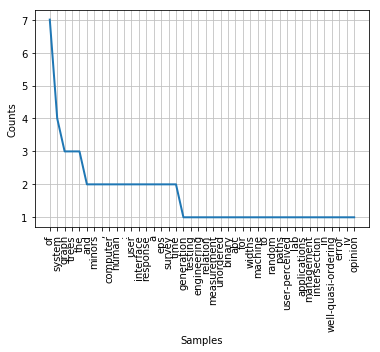

In [54]:
#preprocessing i wektoryzacja
import nltk
import numpy as np

# docs = [d.lower() for d in docs]
# docs = [nltk.word_tokenize(d) for d in docs]

fdist = nltk.FreqDist()
for doc in docs:
    for word in doc:
        fdist[word] += 1

fdist.plot()
plt.show()

from nltk.corpus import stopwords
stops = set(stopwords.words('english')).union(set([':', ',']))

words = set(fdist.keys()).difference(stops)

word2id = dict(zip(words, range(len(words))))

M = []
for doc in docs:
    vec = np.zeros(len(words))
    for word in doc:
        if word not in stops:
            vec[word2id[word]] = 1
    M.append(vec)
            
M = np.vstack(M)

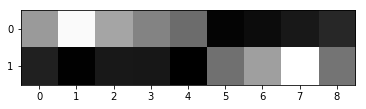

['-1.43*system', '-1.09*user', '-1.06*computer', '-0.94*time', '-0.94*response']
['-0.23*graph', '-0.14*trees', '-0.18*minors', '-0.07*widths', '-0.07*iv']


In [162]:
u, e, v = np.linalg.svd(M.T, full_matrices=False)

e_trunc = np.zeros(9)
e_trunc[:2] = e[:2]
latent_docs = np.diag(e_trunc).dot(v)[:2]
plt.imshow(np.abs(latent_docs), cmap='gray')
plt.show()


#tematy 
topics = u.dot(np.diag(e_trunc))[:,:2].T
t1 = topics[0]
t2 = topics[1]
#t3 = topics[2]

id2word = {v:k for (k,v) in word2id.iteritems()}

print ["%.2f*"%t1[i] + id2word[i] for i in np.argsort(np.abs(t1))[::-1][:5]]
print ["%.2f*"%t1[i] + id2word[i] for i in np.argsort(np.abs(t2))[::-1][:5]]
#print ["%.2f*"%t1[i] + id2word[i] for i in np.argsort(np.abs(t3))[::-1][:5]]

In [173]:
#zapytanie 
from scipy.spatial import distance

q_term = 'computer'
q_vec = np.zeros(len(words))
q_vec[word2id[q_term]] = 1.0


q_latent = q_vec.dot(u.dot(np.diag(e_trunc))[:,:2])

dists = [distance.cosine(q_latent, d) for d in latent_docs.T]
for doc_id in np.argsort(dists):
    print docs[doc_id]

['the', 'eps', 'user', 'interface', 'management', 'system']
['relation', 'of', 'user-perceived', 'response', 'time', 'to', 'error', 'measurement']
['system', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'eps']
['a', 'survey', 'of', 'user', 'opinion', 'of', 'computer', 'system', 'response', 'time']
['human', 'machine', 'interface', 'for', 'lab', 'abc', 'computer', 'applications']
['graph', 'minors', ':', 'a', 'survey']
['graph', 'minors', 'iv', ':', 'widths', 'of', 'trees', 'and', 'well-quasi-ordering']
['the', 'intersection', 'graph', 'of', 'paths', 'in', 'trees']
['the', 'generation', 'of', 'random', ',', 'binary', ',', 'unordered', 'trees']
